In [1]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1)

/home/ailab/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist["data"],mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib as mpl

In [7]:
import matplotlib.pyplot as plt

In [8]:
some_digit = X.iloc[0] 

In [9]:
import numpy as np


some_digit_array = some_digit.to_numpy()


some_digit_image = some_digit_array.reshape(28, 28)

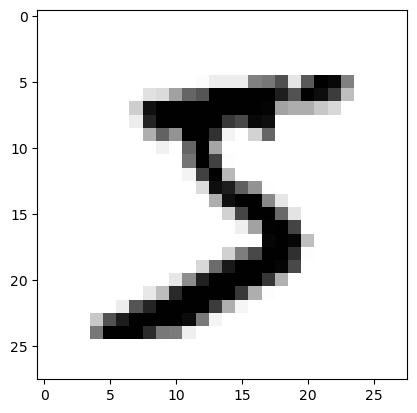

In [10]:
plt.imshow(some_digit_image,cmap="binary")

(0.0, 1.0, 0.0, 1.0)

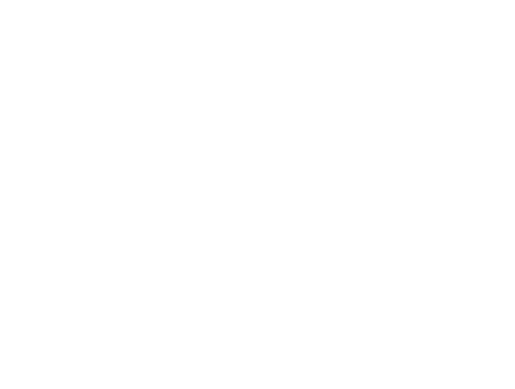

In [11]:
plt.axis("off")

In [12]:
plt.show()

In [13]:
y = y.astype(np.uint8)

In [14]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:],y[:60000],y[60000:]

In [15]:
y_train_5 = (y_train==5)

In [16]:
y_test_5 = (y_test==5)

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state=42)

In [19]:
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

/home/ailab/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [23]:
from sklearn.base import BaseEstimator

In [24]:
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros(len(X),1)

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [29]:
from sklearn.metrics import precision_score,recall_score

In [30]:
precision_score(y_train_5,y_train_pred)

0.8370879772350012

In [31]:
recall_score(y_train_5,y_train_pred)

0.6511713705958311

In [32]:
from sklearn.metrics import f1_score

In [33]:
f1_score(y_train_5,y_train_pred)

0.7325171197343846

In [34]:
from sklearn.svm import SVC

In [35]:
svm_clf=SVC()

In [36]:
svm_clf.fit(x_train,y_train)

SVC()

In [37]:
svm_clf.predict([some_digit])

/home/ailab/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

In [38]:
some_digit_scores = svm_clf.decision_function([some_digit])

/home/ailab/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [39]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [40]:
np.argmax(some_digit_scores)

5

In [41]:
svm_clf.classes_


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [42]:
svm_clf.classes_[5]

5

In [43]:
from sklearn.multiclass import OneVsRestClassifier

In [44]:
ovr_clf = OneVsRestClassifier(SVC())

In [ ]:
ovr_clf.fit(x_train,y_train)

In [ ]:
ovr_clf.predict([some_digit])

In [ ]:
from sklearn.LinerModel import SGDClassifier()


In [ ]:
sgd_clf = SGDClassifier()

In [ ]:
sgd_clf.fit(x_train,y_train)

In [ ]:
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring="accuracy")